#Campus Recruitment Prediction With Machine Learning for MBA Students


 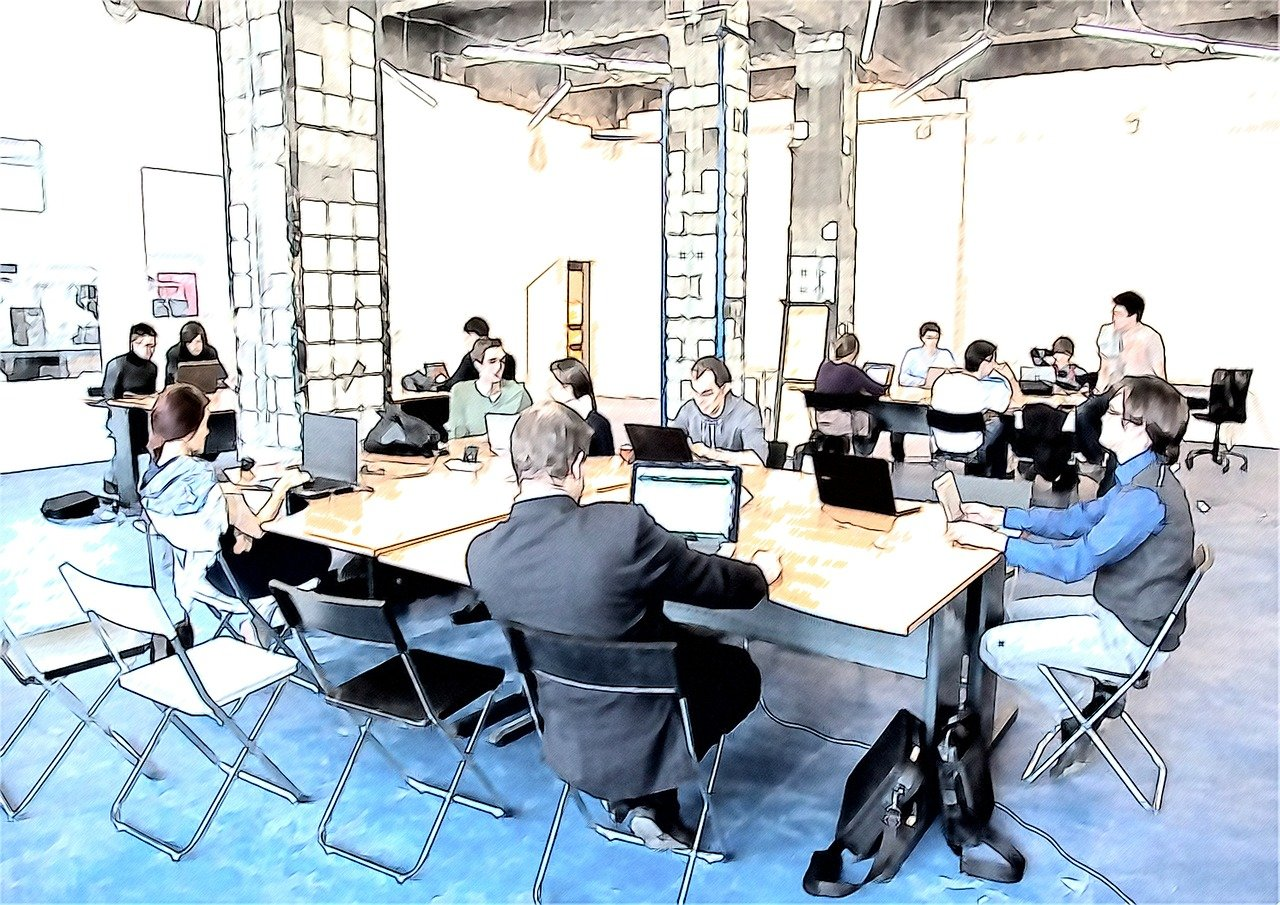

**Student Name: Amarasinghe WLSK** <br>
**Registration Number: EG_2020_3818** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG2020XXYY** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [1]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
import missingno as msno;


## Data Loading

In [2]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Print the first five rows of the loaded dataframe

# Your code goes here
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column
# Your code goes here

# Drop the 'sl_no' column
placement_data = placement_data.drop('sl_no', axis=1)

# Display the first five rows of the dataframe to confirm the change
placement_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [4]:
# Identify the shape of the loaded dataframe
# Your code goes here

# Identify the shape of the loaded dataframe
data_shape = placement_data.shape

# Print the shape of the dataframe
print("Shape of the Dataframe:", data_shape)


Shape of the Dataframe: (215, 14)


In [5]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
placement_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:  <br>

Categorical Features:

1.gender (object) <br>
2.ssc_b (object)  <br>
3.hsc_b (object)  <br>
4.hsc_s (object)  <br>
5.degree_t (object) <br>
6.workex (object)   <br>
7.specialisation (object) <br>
8.status (object)         <br>

Numerical Features:

1.ssc_p (float64)     <br>
2.hsc_p (float64)     <br>
3.degree_p (float64)  <br>
4.etest_p (float64)   <br>
5.mba_p (float64)     <br>
6.salary (float64)**   <br>

In [6]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here

# Print the heading for numerical features
print("Numerical Features Descriptive Statistics:")
# Print the descriptive statistics for numerical features in a table format
placement_data.describe()

Numerical Features Descriptive Statistics:


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
>**A: To prevent data leaking, the dataset was separated into train and test sets, with only the train set used for visualizations. Visualizations are often used to investigate and comprehend the patterns, distributions, and connections present in data. Using the complete dataset, including the test set, for visualization may result in a biased perspective of the data.

The test set is designed to be a totally unexplored dataset, and any insights derived from it should not impact the model development process. Visualizations on the test set may accidentally add biases or assumptions that are not valid for fresh, unseen data.


By displaying just the training set, we guarantee that our comprehension of the data is based on the patterns and traits existing in the data used to train the model. This helps to preserve the assessment process's integrity and guarantees that the test set stays a genuine measure of the model's generalization performance on new, previously unseen data.**

In [7]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here

# Separate independent variables (X) and dependent variable (y)
X = placement_data.drop('status', axis=1)  # Independent variables
y = placement_data['status']  # Dependent variable

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (172, 13)
Shape of X_test: (43, 13)
Shape of y_train: (172,)
Shape of y_test: (43,)


In [8]:
# Print number of training data points

# Your code goes here
num_training_points = len(X_train)
print("Number of Training Data Points:", num_training_points)


Number of Training Data Points: 172


In [9]:
# Print number of testing data points

# Your code goes here
num_testing_points = len(X_test)
print("Number of Testing Data Points:", num_testing_points)


Number of Testing Data Points: 43


Text(0.5, 1.0, 'Distribution of Placement Status in Training Set')

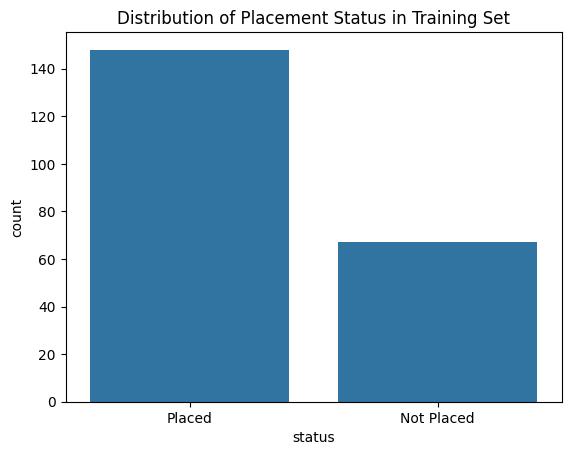

In [10]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

sns.countplot(data=placement_data, x='status')
plt.title('Distribution of Placement Status in Training Set')


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A: yes. The dataset is imbalanced** <br>
1. Biased Model Performance: Imbalanced datasets may provide biased model results. The model may become too sensitive to the dominant class, gaining high accuracy by mostly forecasting the majority class. This might mislead the assessment measures, making the model look more successful than it is.<br>
2. Imbalanced datasets may cause the model to perform poorly when applied to fresh, previously unknown data. The model may fail to accurately forecast instances from the minority class since it did not get enough examples during training. This might result in limited application in real-world situations when both classes are significant.<br>
3. Imbalanced datasets make it difficult for the model to learn minority-specific patterns and traits. The model may fail to capture the intricacies of the minority class, resulting in inferior projections for that class. This is especially significant when the minority group symbolizes crucial or unusual occurrences.<br>



Text(0.5, 1.0, 'Recruitment Status Based on Gender (Training Set)')

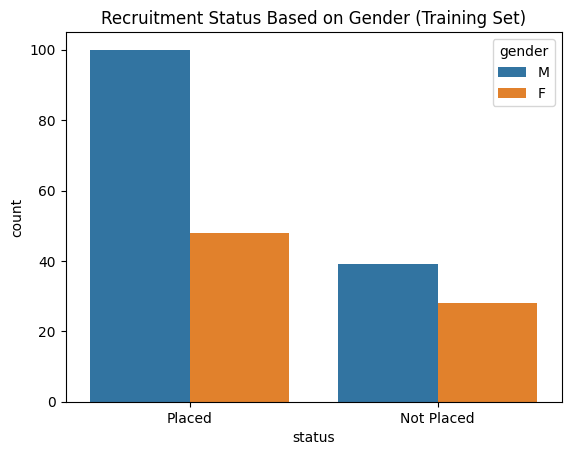

In [11]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

sns.countplot(data=placement_data ,x='status', hue='gender')
plt.title('Recruitment Status Based on Gender (Training Set)')


**Q:** Explain the observation from the above table.
> **A:  There is a tendancy to Recruit a Male person comapairing to a female person <br>
Males account for around 100 placements, showing a greater placement rate than females. Approximately 40 guys are not placed, indicating that a significant proportion of the male population did not get placements.

Female placement rates are lower than male placement rates, with only around 45 females placed compared to the same number of boys. Around 30 females were not placed, showing that a lower proportion of the female population did not get placements than males.**

Text(0.5, 1.0, 'Recruitment Status Based on Post Graduate Specialisation (Training Set)')

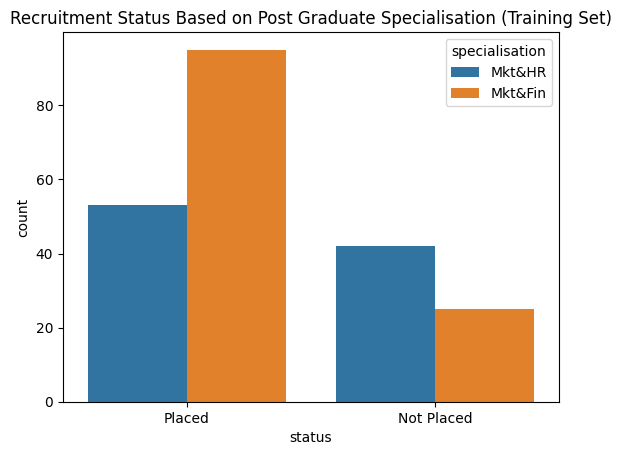

In [12]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here

sns.countplot(data=placement_data ,x= 'status', hue='specialisation')
plt.title('Recruitment Status Based on Post Graduate Specialisation (Training Set)')


**Q:** Inteprete the above results.
> **A: This indecates that the marketing & HR specialisation has more chance to get selected to the job comaparing to marketing and HR<br>
The graphic depicts a bar chart named "Recruitment Status Based on Post Graduate Specialisation (Training Set)". The x-axis represents specialization, whereas the y-axis represents the number of persons who were and were not placed.

Here are a few major insights from the chart:
Overall placement rate: It seems that more persons were put than were not placed, however the precise figures are not evident in the graphic.
Specializations having the greatest placement rates: Marketing & HR (Mkt&HR) has the most persons employed, followed by Marketing & Finance (Mkt&Fin).
Specializations having the lowest placement rates: It is difficult to determine which specialty has the lowest placement rate based on the picture, however Operations & IT (Ops&IT) and Data Science (DS) seem to have the fewest persons placed.
Specializations with comparable placement rates: Some specialties, including Sales & Marketing (S&M) and Retail (Retail), have comparable placement rates.
It is crucial to remember that this chart only reflects data from the training set, and the findings may not be applicable to the actual world. Furthermore, the table does not include other elements that may influence placement, such as the job market, the quality of the program, and the individual's talents and experience.**

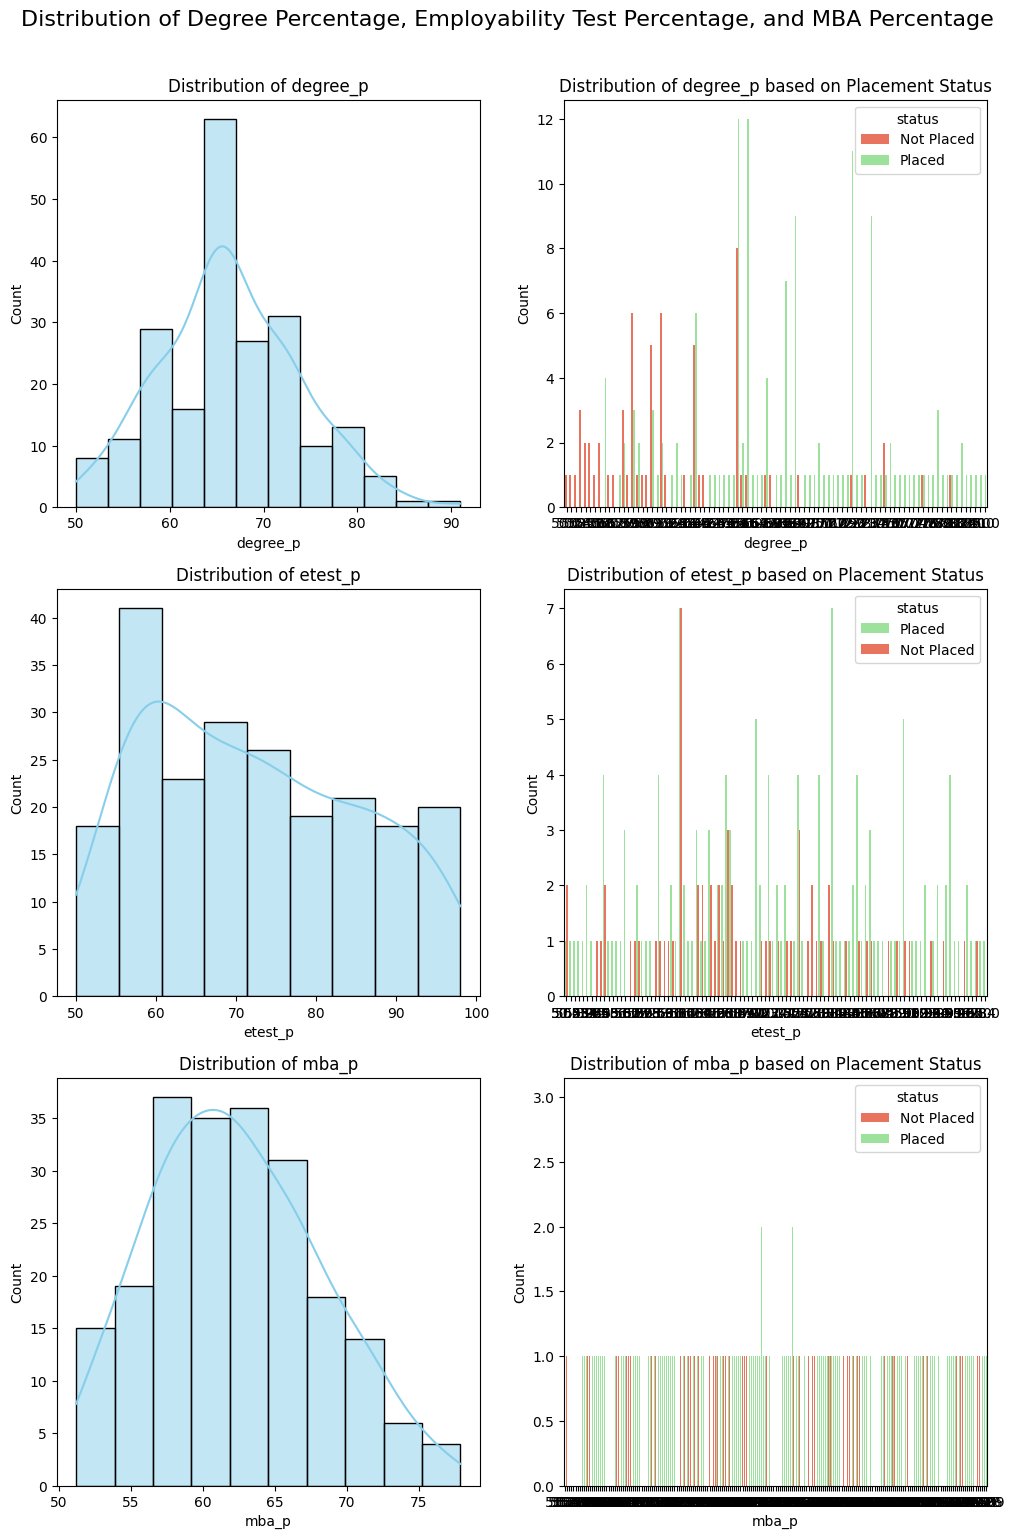

In [13]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
fig.suptitle('Distribution of Degree Percentage, Employability Test Percentage, and MBA Percentage', y=0.93, fontsize=16)

columns = ['degree_p', 'etest_p', 'mba_p']

# Plotting histograms
for i in range(3):
    sns.histplot(data=placement_data, x=columns[i], kde=True, ax=axes[i, 0], color='skyblue')
    sns.countplot(data=placement_data, x=columns[i], hue='status', ax=axes[i, 1], palette={'Placed': 'lightgreen', 'Not Placed': 'tomato'})

# Adjusting titles for count plots and setting x-labels
for i in range(3):
    axes[i, 0].set_title(f'Distribution of {columns[i]}')
    axes[i, 1].set_title(f'Distribution of {columns[i]} based on Placement Status')
    axes[i, 0].set_xlabel(columns[i])
    axes[i, 1].set_xlabel(columns[i])

# Removing unnecessary labels
for ax in axes.flatten():
    ax.set_ylabel('Count')



**Q:** Summarize the visualizations in the above six plots.<br>
> **A: The six charts seem to represent the distribution of three variables: degree %, employability test percentage, and MBA percentage. There are also two plots for each variable, one for the whole data set and one for the data separated by placement status. <br>

Distribution of degree percentage:
The general distribution is tilted to the right, with a higher number of persons holding lesser degrees.
Placed students have a greater degree percentage than other students, as shown by the distribution shift to the right. <br>

Distribution of Employability Test Percentage:
The overall distribution is generally typical, with the majority of participants scoring in the center of the exam.
The distribution of placed and non-placed students differs somewhat, although not significantly. <br>

Distribution of MBA Percentage:
The general distribution is tilted to the left, with more persons holding lower MBA percentages. The distribution for placed students is also pushed to the right when compared to the distribution for all students, showing that placed students have greater MBA percentages.<br>

Overall, these graphs indicate a good association between degree %, MBA percentage, and placement status. Students with higher degrees and MBAs have a better chance of being placed than those with lesser degrees and MBAs. However, it is crucial to emphasize that these are just correlations and do not imply that obtaining a higher degree or an MBA would ensure you a job. Many additional criteria might influence your chances of being placed, including your job experience, talents, and network.  **

In [14]:
# Check for null values in the train set
null_values_train = X_train.isnull().sum()

# Print the null values
print("Null Values in Train Set:")
print(null_values_train)


Null Values in Train Set:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64


In [15]:
# Check for null values in the test set
null_values_test = X_test.isnull().sum()

# Print the null values
print("Null Values in Test Set:")
print(null_values_test)


Null Values in Test Set:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64


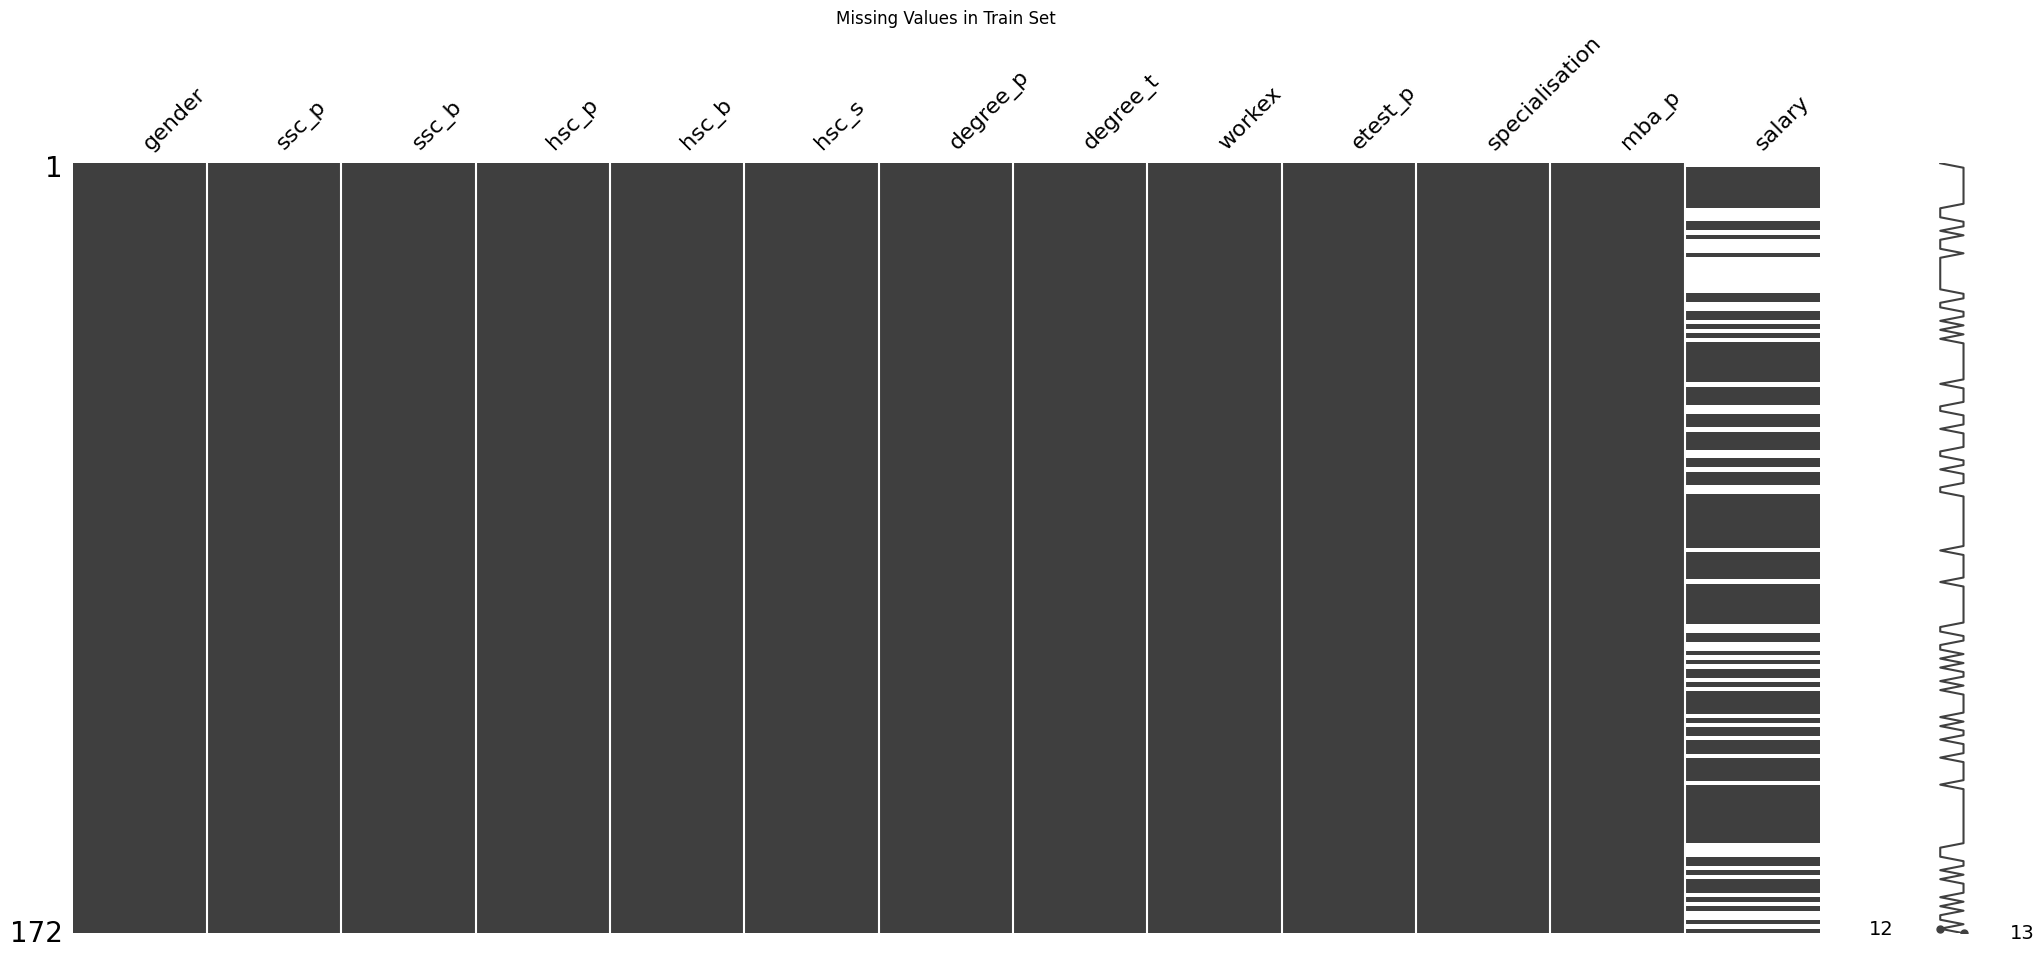

In [16]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
msno.matrix(X_train)
plt.title('Missing Values in Train Set')
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A: Imputing missing values in the 'salary' column with the mean is a simple and quick method. While it maintains the original dataset size and is easy to implement, be aware that it assumes the data is Missing Completely at Random (MCAR) and may introduce bias. Consider exploring alternative methods like Multiple Imputation or Model-Based Imputation to handle missing data more comprehensively, preserving relationships and avoiding potential distortions in the data.**


In [17]:
 # Handle the missing data
 # Your code goes here

# Handle missing data by imputing the 'salary' column with mean
X_train['salary'].fillna(value=X_train['salary'].mean() , inplace=True);


In [18]:
# Test the training dataset after processing the null values
# Your code goes here
print("Missing Values in Train Set After Handling:")
print(X_train.isnull().sum())


Missing Values in Train Set After Handling:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [19]:
# Process the null values in the test set

# Your code goes here
X_test['salary'].fillna(value=X_test['salary'].mean() , inplace=True);


In [20]:
# Test the testing dataset after processing the null values

# Your code goes here
print("Missing Values in Test Set After Handling:")
print(X_test.isnull().sum())


Missing Values in Test Set After Handling:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A: Label Encoding : <br>
I used Scikit-Learn's Label Encoder to encode categorical features in the training set. When working with ordinal categorical data, label encoding is an appropriate option since the categories have a meaningful order. This encoding approach provides a unique numeric label to each category depending on its order. While Label Encoding is a simple solution that may be useful for some scenarios, it is important to be aware of its limits. Specifically, the encoded integer values may suggest ordinal connections, which might influence the interpretation of my machine learning model. However, since I have previously trained my model using Label Encoding, I must guarantee consistency in encoding when applying the model to fresh data in order to retain compatibility and accuracy.**

In [21]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.compose import make_column_transformer

# List the categorical features

# Your code goes here
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
from sklearn.preprocessing import  LabelEncoder

# Encode the training features

# Your code goes here
for feature in categorical_features:
     encoder = LabelEncoder()
     X_train[feature] = encoder.fit_transform(X_train[feature])



In [22]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 93 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          172 non-null    int32  
 1   ssc_p           172 non-null    float64
 2   ssc_b           172 non-null    int32  
 3   hsc_p           172 non-null    float64
 4   hsc_b           172 non-null    int32  
 5   hsc_s           172 non-null    int32  
 6   degree_p        172 non-null    float64
 7   degree_t        172 non-null    int32  
 8   workex          172 non-null    int32  
 9   etest_p         172 non-null    float64
 10  specialisation  172 non-null    int32  
 11  mba_p           172 non-null    float64
 12  salary          172 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 14.1 KB


In [23]:
# Encode the testing features

# Your code goes here
for feature in categorical_features:
     encoder = LabelEncoder()
     X_test[feature] = encoder.fit_transform(X_test[feature])

In [24]:
# Encode the target variable in train and test sets

# Your code goes here

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [25]:
# Print the encoded labels for the training set

# Your code goes here
print("Encoded Labels for the Training Set:")
print(y_train)


Encoded Labels for the Training Set:
[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Scale the Numerical Features

In [26]:
# Standard Scale the numerical features

from sklearn.preprocessing import  StandardScaler

encoder = StandardScaler()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)



In [27]:
# Display the head of the scaled training set
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.722581,-1.394730,-0.965704,-0.354257,-1.315355,-0.577129,-1.601854,-0.666047,-0.704026,-0.051326,1.137248,-1.151702,0.000000
1,0.722581,0.262928,-0.965704,-0.266971,0.760251,1.105349,0.517889,1.602469,1.420403,-1.326412,-0.879316,-0.038470,0.130201
2,0.722581,0.539205,-0.965704,1.042309,0.760251,-0.577129,-0.144531,-0.666047,1.420403,1.708292,-0.879316,-0.011442,1.679366
3,0.722581,-0.013348,1.035514,-0.266971,-1.315355,-0.577129,0.782857,-0.666047,-0.704026,-1.251407,1.137248,-0.307065,-0.838028
4,0.722581,1.239105,1.035514,1.391451,0.760251,-0.577129,1.524767,-0.666047,-0.704026,1.373770,-0.879316,2.071433,1.421172


In [28]:
# Display the head of the scaled testing set
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.722581,0.170836,1.035514,-0.528828,0.760251,-2.259608,-0.144531,-0.666047,-0.704026,1.115002,-0.879316,-1.590913,0.130201
1,0.722581,-0.013348,1.035514,0.082170,0.760251,-2.259608,0.915341,-0.666047,1.420403,-1.026392,-0.879316,1.265649,0.065652
2,-1.383927,1.368034,1.035514,-0.179686,0.760251,-0.577129,0.915341,1.602469,1.420403,1.748795,-0.879316,1.611950,-0.515285
3,-1.383927,-0.750085,-0.965704,-0.528828,0.760251,-2.259608,-1.336886,-0.666047,-0.704026,-1.326412,1.137248,-0.731073,-0.902576
4,-1.383927,-0.197532,-0.965704,0.780453,-1.315355,-2.259608,0.385405,-0.666047,1.420403,-0.051326,-0.879316,0.410877,-1.160771


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1: SMOTE is an oversampling strategy that addresses class imbalance in machine learning datasets, especially for binary classification problems. The approach generates synthetic samples of the minority class to balance the class distribution.**<br>
> **A2 (Advantage): 
1) No duplicates of existing instances:
   SMOTE does not replicate existing minority instances. Instead, it generates synthetic instances to reduce the danger of overfitting on the training set.
2) Preservation of information:
   SMOTE generates synthetic instances that are not exact duplicates of current instances, allowing for greater preservation of the minority class's underlying patterns and information.
3) Reduced sensitivity to noise:
   By producing synthetic instances based on the connections between existing instances, SMOTE may be less sensitive to noisy minority occurrences.
4) Effective Management of Non-Linear Decision Boundaries:
   SMOTE may be useful in situations when the decision border between classes is non-linear, since it produces instances along the line that connects neighbors, capturing complicated connections.
5) Enhanced generalization:
   The use of synthetic examples improves the model's ability to generalize to previously unknown data, particularly when the minority class is underrepresented.**

In [29]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=3)

# Apply SMOTE to oversample the training set
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


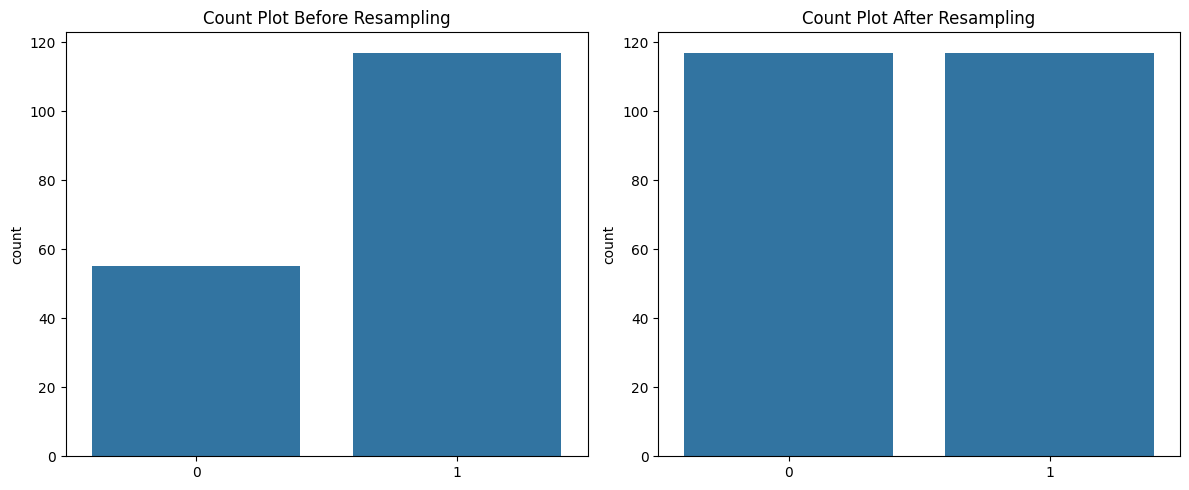

In [30]:
# plot the count plots side by side before and after resampling

# Your code goes here

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot count plot before resampling
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Count Plot Before Resampling')

# Plot count plot after resampling
sns.countplot(x=y_train_oversampled, ax=axes[1])
axes[1].set_title('Count Plot After Resampling')

# Adjust layout
plt.tight_layout()


As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A: No, it is not advisable to oversample the test set. Oversampling, like any other data preparation approach, is intended to improve model training by resolving class imbalance. However, the testing set should still be indicative of the real-world distribution of data.

Oversampling the testing set may cause bias, resulting in an unduly positive assessment of the model's performance. Oversampling the testing set might jeopardize the model's capacity to generalize to previously unknown data, which must be assessed.


In general, the testing set should be preserved in its original distribution to allow for an impartial evaluation of the model's performance on real-world data. Oversampling and preprocessing should only be done to the training set.**

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [31]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline


In [32]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
pipeline = Pipeline([('smt', smote), ('svm', SVC())])


In [33]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold
stratifiedCV = StratifiedKFold(n_splits=5)


**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A: 
Preserves class distribution : Ensures that each fold has the same percentage of classes as the original dataset.

Reduces data leakage risk : Helps to avoid biased assessments in instances when there is a risk of data leaking.

Improves model evaluation : Provides more consistent and generalizable performance measures, particularly for skewed datasets.

Enhances training stability : Contributes to a more consistent training process by preserving class balance across all folds.

Better Generalization Assessment : Allows for a more accurate estimate of a model's performance on an unknown dataset, taking into account varied class distributions.**

In [34]:
# Define the parameter grid for grid search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]  # Include 'scale' and 'auto' for automatic tuning
}


In [35]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
from sklearn.model_selection import GridSearchCV
# Define the grid search instance
grid_search = GridSearchCV(pipeline, param_grid , cv = 5)


In [36]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smt', SMOTE(random_state=3)),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'svm__kernel': ['linear', 'rbf']})

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [37]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
print("Mean Cross-Validated Score (Accuracy):", grid_search.best_score_)


Mean Cross-Validated Score (Accuracy): 0.860672268907563


In [38]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


In [39]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_

# Display the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('smt', SMOTE(random_state=3)),
                ('svm', SVC(C=100, gamma=0.001))])


### Model Evaluation

In [40]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train, y_train)


Pipeline(steps=[('smt', SMOTE(random_state=3)),
                ('svm', SVC(C=100, gamma=0.001))])

In [41]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
print("Accuracy on the train set:",best_estimator.score(X_train , y_train) )


Accuracy on the train set: 0.8953488372093024


In [42]:
# Calculate the accuracy for the test set

# Your code goes here
print("Accuracy on the test set:", best_estimator.score(X_test , y_test) )


Accuracy on the test set: 0.8372093023255814


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A: The reported accuracies indicate that the model performs well on both the training and test sets, however there is a significant decline in accuracy from the training (0.895) to the test (0.837). While these accuracies are rather good, the performance difference might imply some overfitting. But, because of this small difference, we cant tell its overfitting. 

Overfitting happens when a model learns the training data too well, collecting noise and certain patterns that do not apply to fresh, unseen data. A considerable difference between training and test accuracies is frequently indicative of overfitting.


In this scenario, the decrease in accuracy from the training set to the test set indicates that the model may be overfitting the training data. It is recommended to investigate ways for reducing overfitting, such as regularization methods, expanding the dataset size, or fine-tuning hyperparameters. Regularization methods like as dropout or L2 regularization may assist prevent the model from overfitting the noise in the training data, hence improving generalization to new data.**

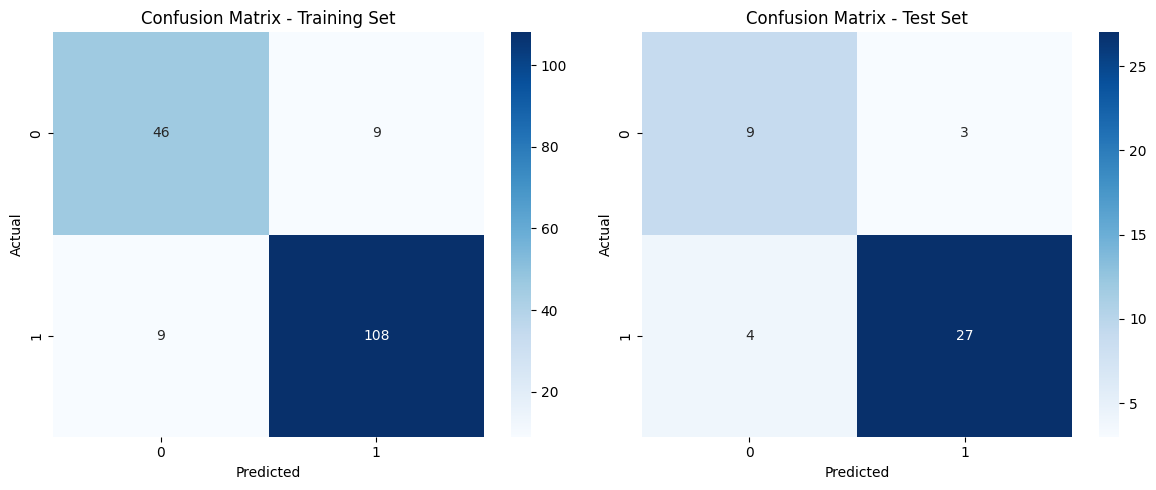

In [43]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the best estimator to the whole training dataset
best_estimator.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_estimator.predict(X_train)

# Make predictions on the test set
y_test_pred = best_estimator.predict(X_test)

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot confusion matrix for the training set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for the test set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()




**Q:** Comment about the obtained confusion matrices. <br>
> **A: The confusion matrices show the model's ability to generalize well from the training set to the test set, learning patterns that apply to new data. The training set has higher accuracy than the test set, but the difference is not significant. The model is more likely to make false positives than false negatives, possibly due to lower false positive costs. However, other factors should be considered when evaluating a model.

*Training Set Confusion Matrix:*
- True Positives (TP): 108
- False Positives (FP): 9
- False Negatives (FN): 9
- True Negatives (TN): 46

The high number of true positives (108) indicates that the model correctly predicted the "Placed" class for the majority of instances in the training set. The low number of false positives (9) suggests that the model made very few incorrect predictions of "Placed" when the actual class was "Not placed". Similarly, the low number of false negatives (9) indicates that the model made few incorrect predictions of "Not placed" when the actual class was "Placed". Overall, the model's performance on the training set appears to be quite strong.


*Test Set Confusion Matrix:*
- True Positives (TP): 27
- False Positives (FP): 3
- False Negatives (FN): 4
- True Negatives (TN): 9

The test set confusion matrix shows similar patterns to the training set. The model correctly predicted the "Placed" class for a majority of instances (27 true positives) and made very few incorrect predictions of "Placed" (3 false positive) or "Not placed" (4 false negatives). The number of true negatives (9) indicates correct predictions of "Not placed". Overall, the model's performance on the test set is also quite strong, although there are slightly more false negatives and false positives compared to the training set.

**

In [44]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report

# Generate the classification report for the test set
class_report_test = classification_report(y_test, y_test_pred)

# Print the classification report
print("Classification Report - Test Set:")
print(class_report_test)


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.90      0.87      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.84      0.84      0.84        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A: The classification report evaluates a model's performance on individual classes, focusing on precision, recall, and the balance between the two. It provides insights into the model's accuracy across all classes and assesses its generalization to different classes in the test set. Precision is the ratio of correctly predicted positive observations to total positives, with higher precision indicating a lower false positive rate. Recall is the ratio of correctly predicted positive observations to total actual positives, with higher recall indicating a lower false negative rate. The F1-score balances precision and recall.**

0.810483870967742


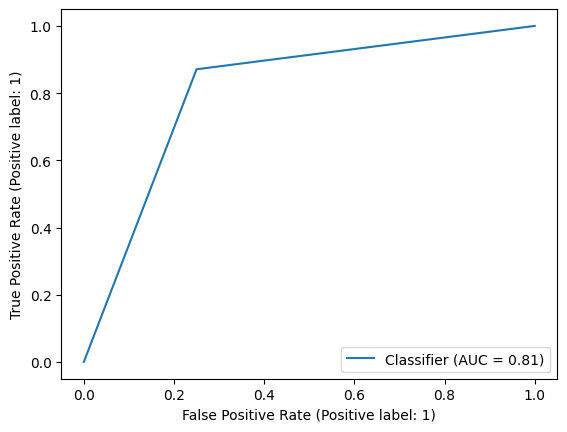

In [45]:

# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import  RocCurveDisplay

fig = RocCurveDisplay.from_predictions(y_test , y_test_pred)

print(fig.roc_auc)



**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A: The Receiver Operating Characteristic Curve (ROC) is a graphical tool used to evaluate binary classification models' performance. It plots the true positive rate (TPR) against the false positive rate (FPR) on the x-axis. An ideal ROC curve is close to the upper left corner, indicating the model can correctly classify all positive cases without false positives. The AUC (Area Under the Curve) represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. The ROC curve is smooth and consistent across different thresholds, but it is not excellent. Other factors to consider when evaluating a model include precision, recall, and F1-score.**